## Check number of patients

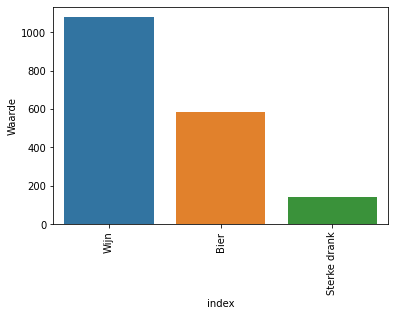

In [1]:
import pandas as pd
import seaborn as sns

df_alc =pd.read_csv('../data/ZWN_alcohol.csv', sep=',')
df_alc[df_alc['Nette_titel']=='Soort']['Waarde'].value_counts()#.plot(kind='bar')
 
ax = sns.barplot(data=pd.DataFrame(df_alc[df_alc['Nette_titel']=='Soort']['Waarde'].value_counts()).reset_index(), y='Waarde', x='index')
ax.tick_params(axis='x', rotation=90)

In [ ]:
import pandas as pd

df_man =pd.read_csv('../data/ZWN_gewrichtspop.csv', sep=',')
df_man

In [ ]:
import pandas as pd

df_conc =pd.read_csv('../data/ZWN_conclusie.csv', sep=';')
df_conc

Text(0.5, 0, 'Age')

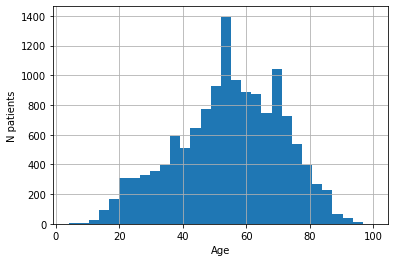

In [4]:
import pandas as pd

df_demograph =pd.read_csv('../data/ZWN_leeftijd_en_geslacht.csv', sep=',')
plt = df_demograph['Leeftijd_Eerste_Afspraak'].hist(bins=30)
plt.set_ylabel('N patients')
plt.set_xlabel('Age')


## Visualize the provinces

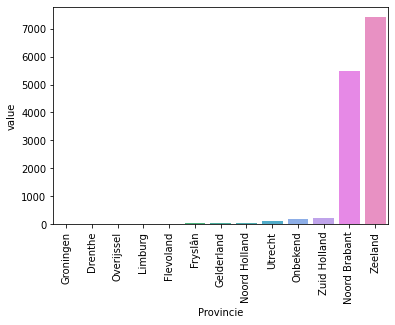

In [5]:
import seaborn as sns
import pandas as pd

df_prov =pd.read_csv('../summary/Occurrence_per_province.csv')
df_prov = df_prov.sort_values(by='value')
 
ax = sns.barplot(data=df_prov, x="Provincie", y="value")
ax.tick_params(axis='x', rotation=90)

## Visualize most occurring joints

### ToDo: project on Mannequin

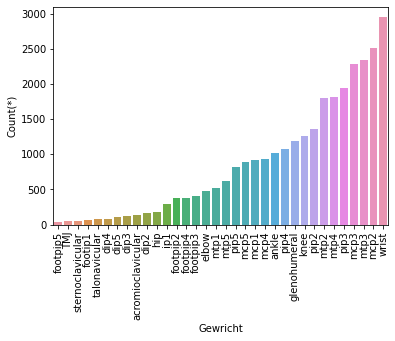

In [6]:
import seaborn as sns
import pandas as pd

df_joint =pd.read_csv('../summary/Occurrence_per_joint.csv')
df_joint = df_joint.sort_values(by='Count(*)')
 
ax = sns.barplot(data=df_joint, x="Gewricht", y="Count(*)")
ax.tick_params(axis='x', rotation=90)

## 3. Check diagnoses

### 3.1 get an overview of all icd10 CM codes 

In [12]:
import pandas as pd
import simple_icd_10_cm as icd10
import re

df_code_desc = pd.DataFrame(columns = ['ICD10code', 'desc'])


df_ref = pd.read_csv('../suppl/Section111ValidICD10-Jan2023-DupFixed.csv', sep=';')
df_icd= pd.read_csv('../data/ZWN_DiagnoseICD.csv', sep='|')
l_icd = list(df_icd['ICD10code'].dropna().unique()) # ['M06.90', 'M06.99', 'M13.19'] 

for raw_code in l_icd: 
    # keep last decimal -> to ensure finding desc
    code = re.sub(r'(?<=\.\d).*', r'', raw_code) 
    code = code.replace('.', '')
    if icd10.is_valid_item(code):
        #print(raw_code, '\t', icd10.get_description(code))
        df_code_desc = pd.concat([df_code_desc,pd.Series({'ICD10code' : raw_code, 'desc' : icd10.get_description(code)}).to_frame().T],ignore_index=True)
    else : 
        code = re.sub(r'(?<=\.).*', r'', raw_code)
        code = code.replace('.', '')
        if icd10.is_valid_item(code):
            #print('Parent:', raw_code, '\t', icd10.get_description(code))
            df_code_desc = pd.concat([df_code_desc,pd.Series({'ICD10code' : raw_code, 'desc' : icd10.get_description(code)}).to_frame().T],ignore_index=True)
        elif code == 'Y42': # exceptions 
            #print(raw_code, 'is a drug')
            df_code_desc = pd.concat([df_code_desc,pd.Series({'ICD10code' : raw_code, 'desc' : 'Glucocorticoids and synthetic analogues'}).to_frame().T],ignore_index=True)
        elif code == 'M82': 
            df_code_desc = pd.concat([df_code_desc,pd.Series({'ICD10code' : raw_code, 'desc' : 'Osteoporosis in endocrine disorders Site unspecified'}).to_frame().T],ignore_index=True)
        elif code == 'E14': 
            df_code_desc = pd.concat([df_code_desc,pd.Series({'ICD10code' : raw_code, 'desc' : 'Unspecified diabetes mellitus'}).to_frame().T],ignore_index=True)
        else :
            print('Code not found: ', raw_code)
        
df_code_desc.to_csv('../suppl/mapped_icd_desc.csv', sep='|', index=None)
df_code_desc.head()

Code not found:       


,ICD10code,desc
0,M06.99,"Rheumatoid arthritis, unspecified"
1,L40.5+,Arthropathic psoriasis
2,E85.0,Non-neuropathic heredofamilial amyloidosis
3,M11.09,Hydroxyapatite deposition disease
4,M13.19,"Monoarthritis, not elsewhere classified"


In [21]:
import pandas as pd
import numpy as np

df_icd = pd.read_csv('../data/ZWN_DiagnoseICD.csv', sep='|')
df_code_desc = pd.read_csv('../suppl/mapped_icd_desc.csv', sep='|')
d_map = dict(zip(df_code_desc['ICD10code'], df_code_desc['desc']))
df_icd['Diagnosis'] = df_icd['ICD10code'].apply(lambda x : d_map[x] if x in d_map.keys() else np.nan)
df_icd['xlabel'] = df_icd['ICD10code'] + ' (' + df_icd['Diagnosis'] + ')'


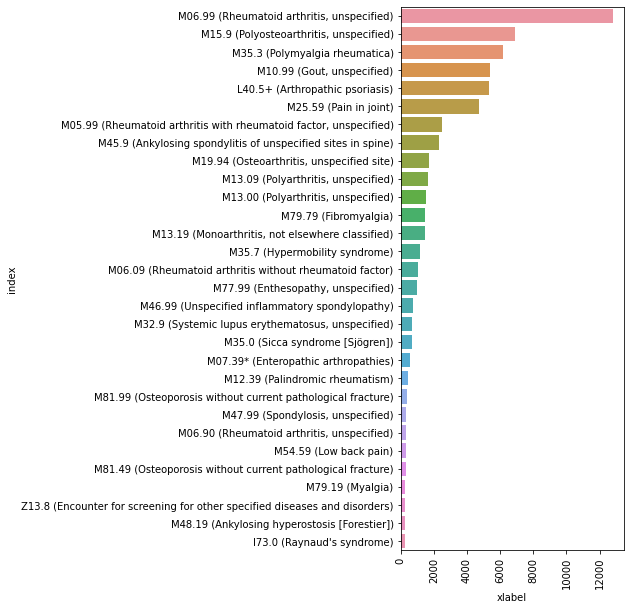

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(4,10))

ax = sns.barplot(data=pd.DataFrame(df_icd['xlabel'].value_counts()[:30]).reset_index(), x='xlabel', y='index', orient='h')
ax.tick_params(axis='x', rotation=90) # Diagnosis

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
ax = sns.barplot(data=pd.DataFrame(df_icd['ICD10code'].value_counts()[:100]).reset_index(), y='ICD10code', x='index')
ax.tick_params(axis='x', rotation=90) # Diagnosis

In [57]:
df_code_desc[df_code_desc['desc'].isin(l_RA)]['ICD10code'].unique()

array(['M06.99', 'M06.09', 'M05.99', 'M06.90', 'M05.29', 'M05.19+'],
      dtype=object)

In [51]:
l_RA = ['Rheumatoid arthritis with rheumatoid factor, unspecified', 'Rheumatoid arthritis, unspecified', 'Rheumatoid arthritis without rheumatoid factor', 'Rheumatoid vasculitis with rheumatoid arthritis',  'Rheumatoid lung disease with rheumatoid arthritis']

l_putative_RA = ['Polyarthritis, unspecified','Monoarthritis, not elsewhere classified', 'Rheumatoid nodule', 'Rheumatic fever without heart involvement', 'Rheumatism, unspecified', 'Unspecified juvenile rheumatoid arthritis',]

In [49]:
df_code_desc.desc.unique()

array(['Rheumatoid arthritis, unspecified', 'Arthropathic psoriasis',
       'Non-neuropathic heredofamilial amyloidosis',
       'Hydroxyapatite deposition disease',
       'Monoarthritis, not elsewhere classified',
       'Polyosteoarthritis, unspecified', 'Polyarthritis, unspecified',
       'Gout, unspecified', 'Systemic lupus erythematosus, unspecified',
       'Synovitis and tenosynovitis, unspecified',
       'Osteoporosis without current pathological fracture',
       'Unspecified inflammatory spondylopathy',
       'Sicca syndrome [Sjögren]', 'Pain in joint', 'Fibromyalgia',
       'Bursitis of shoulder',
       'Ankylosing spondylitis of unspecified sites in spine',
       'Rheumatoid arthritis without rheumatoid factor',
       'Polymyalgia rheumatica',
       'Rheumatoid arthritis with rheumatoid factor, unspecified',
       'Encounter for screening for other specified diseases and disorders',
       'Primary osteoarthritis of other joints',
       'Enthesopathy, unspecifie